In [ ]:
!apt-get install -y --no-install-recommends openjdk-8-{jre,jdk}-headless openjdk-8-jre
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install py7zr

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [ ]:
from re import findall
from pathlib import Path
import py7zr
from shutil import rmtree

In [ ]:
path_to_source_folder = '/content/drive/MyDrive/20classes_csv.7z'

In [ ]:
make_dir = Path('/content/ASLdataset')
if make_dir.exists(): rmtree(make_dir)
make_dir.mkdir()

if findall('.7z', str(path_to_source_folder)):
    with py7zr.SevenZipFile(path_to_source_folder, mode='r') as z:
        z.extractall('/content/ASLdataset')
    path_to_source_folder = Path('/content/ASLdataset/csv')
elif findall('.zip', str(path_to_source_folder)):
    !unzip $path_to_source_folder -d /content/ASLdataset
    path_to_source_folder = Path('/content/ASLdataset/csv')
else:
    path_to_source_folder = Path(path_to_source_folder)

In [ ]:
path_to_source_folder = '/content/drive/MyDrive/V_dataset/Bird.rar'
!unzip $path_to_source_folder -d /content

In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive('/content/drive/MyDrive/V_dataset/Bird.rar', outdir="/content")

In [ ]:
!cp /content/ASLdataset/csv/Age -r /content/Age,Favourite,Bird
!cp /content/ASLdataset/csv/Favourite -r /content/Age,Favourite,Bird
!cp /content/ASLdataset/csv/Bird -r /content/Age,Favourite,Bird


In [ ]:
with py7zr.SevenZipFile('Age,Favourite,Bird.7z', 'w') as archive:
    archive.writeall('/content/Age,Favourite,Bird_csv')

In [ ]:
for csv in csv_file:
    d = read_csv(str(csv), header=None ).values
    if d.shape == (50,1629):
            random_number = random.randint(1,30)
            x_valid.append(d[random_number:random_number+20])
            label = split(split(csv)[0])[1]
            print(csv,"  ", label)
            y_valid.append(label)
    else:
            f_valid.append(d)
            print(d.shape)

In [ ]:
!pip install mediapipe
!pip install py7zr
import os
import glob
from pathlib import Path
from csv import writer
import cv2
from cv2 import VideoCapture, waitKey, imshow, cvtColor, flip, COLOR_BGR2RGB, COLOR_RGB2BGR, putText, FONT_HERSHEY_SIMPLEX, resize, rectangle, line, VideoWriter_fourcc, VideoWriter
from numpy import asscalar, ndarray, array, zeros, concatenate
from pathlib import Path
from shutil import rmtree
import mediapipe as mp
import py7zr
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
class MediapipeExtractor:
    def extract_landmarks(self, results) -> ndarray:
        result_landmarks = {
            'left hand': {
                'landmark': results.left_hand_landmarks,
                'shape': (21,)
            },
            'right hand': {
                'landmark': results.right_hand_landmarks,
                'shape': (21,)
            },
            'pose': {
                'landmark': results.pose_landmarks,
                'shape': (33,)
            }
        }

        result_all = []
        result_temp = []
        for key, result in result_landmarks.items():
            if result['landmark']:
                result_temp = array([array([l.x, l.y, l.z]) for l in result['landmark'].landmark])
                result_temp = result_temp.flatten()
            else:
                result_temp = zeros((result['shape'][0] * 3, ))

            assert(result_temp.shape == (result['shape'][0] * 3, ))
            result_all.append(result_temp)
            
        shape = 0
        result_final = array([])
        for result in result_all:
            shape += result.shape[0]
            result_final = concatenate((result_final, result), axis=0)

        assert(result_final.shape == (shape,))

        return result_final

In [ ]:
class ImageHandler:
    def draw_results(self, image, results):
        image.flags.writeable = True

        # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, landmark_drawing_spec=None, connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

        return image
class Writer:
    temp_path = ''

    def write_to_csv(self, result: ndarray, out_csv: str):
        out_csv = Path(out_csv)

        with out_csv.open('a+') as csv:
            csv_writer = writer(csv)
            csv_writer.writerow(result)

    def write_as_video(self, path, image):
        if self.temp_path != path: 
            self.temp_path = path
            self.writer = VideoWriter(path, VideoWriter_fourcc('M','J','P','G'), 10, (640, 480))

        self.writer.write(image)


In [ ]:
me = MediapipeExtractor()
w = Writer()
im = ImageHandler()
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
#cap.set first param
#0. CV_CAP_PROP_POS_MSEC Current position of the video file in milliseconds.
# 1. CV_CAP_PROP_POS_FRAMES 0-based index of the frame to be decoded/captured next.
# 2. CV_CAP_PROP_POS_AVI_RATIO Relative position of the video file
# 3. CV_CAP_PROP_FRAME_WIDTH Width of the frames in the video stream.
# 4. CV_CAP_PROP_FRAME_HEIGHT Height of the frames in the video stream.
# 5. CV_CAP_PROP_FPS Frame rate.
# 6. CV_CAP_PROP_FOURCC 4-character code of codec.
# 7. CV_CAP_PROP_FRAME_COUNT Number of frames in the video file.
# 8. CV_CAP_PROP_FORMAT Format of the Mat objects returned by retrieve() .
# 9. CV_CAP_PROP_MODE Backend-specific value indicating the current capture mode.
# 10. CV_CAP_PROP_BRIGHTNESS Brightness of the image (only for cameras).
# 11. CV_CAP_PROP_CONTRAST Contrast of the image (only for cameras).
# 12. CV_CAP_PROP_SATURATION Saturation of the image (only for cameras).
# 13. CV_CAP_PROP_HUE Hue of the image (only for cameras).
# 14. CV_CAP_PROP_GAIN Gain of the image (only for cameras).
# 15. CV_CAP_PROP_EXPOSURE Exposure (only for cameras).
# 16. CV_CAP_PROP_CONVERT_RGB Boolean flags indicating whether images should be converted to RGB.
# 17. CV_CAP_PROP_WHITE_BALANCE Currently unsupported
# 18. CV_CAP_PROP_RECTIFICATION Rectification flag for stereo cameras (note: only supported by DC1394 v 2.x backend currently)

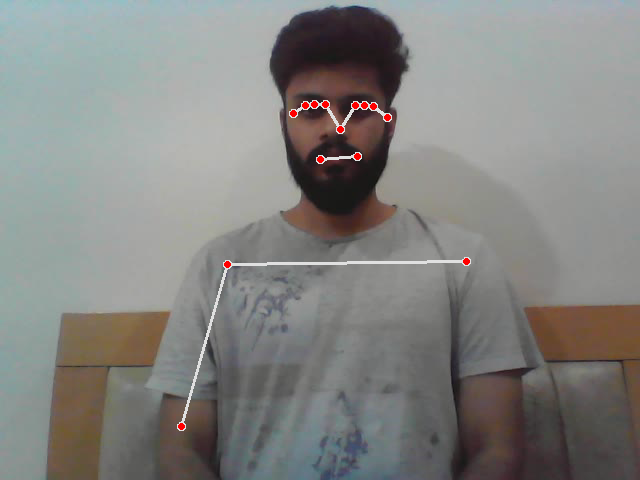

63
(63,)
63
(63,)
before RESULTS landmarks :  {'left hand': {'landmark': None, 'shape': (21,)}, 'right hand': {'landmark': None, 'shape': (21,)}, 'pose': {'landmark': landmark {
  x: 0.5319551825523376
  y: 0.2689053416252136
  z: -0.7620977163314819
  visibility: 0.9998898506164551
}
landmark {
  x: 0.5552167892456055
  y: 0.21992839872837067
  z: -0.7204878926277161
  visibility: 0.9998354911804199
}
landmark {
  x: 0.5695118308067322
  y: 0.22018909454345703
  z: -0.7205500602722168
  visibility: 0.9998262524604797
}
landmark {
  x: 0.5842344760894775
  y: 0.2213805764913559
  z: -0.7207209467887878
  visibility: 0.9998084902763367
}
landmark {
  x: 0.5088433623313904
  y: 0.2184668928384781
  z: -0.7212770581245422
  visibility: 0.9998517036437988
}
landmark {
  x: 0.49098244309425354
  y: 0.21849454939365387
  z: -0.7208986878395081
  visibility: 0.9998550415039062
}
landmark {
  x: 0.4774666726589203
  y: 0.21902966499328613
  z: -0.72126704454422
  visibility: 0.9998672008514404

In [ ]:
cap = VideoCapture(str('/Age_2.avi'))
frame_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_length = 1
with mp_holistic.Holistic(
        min_detection_confidence = 0.5,
        min_tracking_confidence = 0.5
    ) as holistic:
        while cap.isOpened() and frame_length!=0:
            #print(frame_length)
            image: ndarray
            cap.set(1,1)
            success, image = cap.read()

            if not success: continue
            image = cvtColor(image, COLOR_BGR2RGB)

            image.flags.writeable = False
            results = holistic.process(image)

            image = cvtColor(image, COLOR_RGB2BGR)
            image = im.draw_results(image, results)
            cv2_imshow(image)
            # print(results.right_hand_landmarks)
            # print("------------------------------------------------------------------------------------------")
            # break
            result_landmarks = {
                'left hand': {
                    'landmark': results.left_hand_landmarks,
                    'shape': (21,)
                },
                'right hand': {
                    'landmark': results.right_hand_landmarks,
                    'shape': (21,)
                },
                'pose': {
                    'landmark': results.pose_landmarks,
                    'shape': (33,)
                }
                                 }
            # print('RESULTS landmarks : ', len(result_landmarks['face']),'\n', result_landmarks['face'] )
            # print("------------------------------------------------------------------------------------------")
            # break
            result_all = []
            result_temp = []
            for key, result in result_landmarks.items():
                if result['landmark']:
                    print('before RESULTS landmarks : ', result_landmarks)
                    print("------------------------------------------------------------------------------------------")
                    result_temp = array([array([l.x, l.y, l.z]) for l in result['landmark'].landmark])
                    print('After RESULTS landmarks : ', result_temp)
                    print("------------------------------------------------------------------------------------------")
                    result_temp = result_temp.flatten()
                    print('Flaten landmarks : ', result_temp)
                    print("------------------------------------------------------------------------------------------")
                else:
                    result_temp = zeros((result['shape'][0] * 3, ))
                print(result['shape'][0] * 3)
                print(result_temp.shape)
                assert(result_temp.shape == (result['shape'][0] * 3, ))
                result_all.append(result_temp)
                
            shape = 0
            result_final = array([])
            for result in result_all:
                shape += result.shape[0]
                result_final = concatenate((result_final, result), axis=0)

            assert(result_final.shape == (shape,))

            landmarks = result_final            

            landmarks = me.extract_landmarks(results)
            print('LANDMARKS    : ', landmarks)
            print("------------------------------------------------------------------------------------------")
            # w.write_to_csv(landmarks, out_directory / f'{video_name}.csv')
            frame_length-=1

In [ ]:
import numpy
  
arr1 = numpy.array([])
arr2 = numpy.array([3, 5, 7, 9])
  
hmm = numpy.concatenate((arr1, arr2), axis = 0)
  
print (hmm)

[3. 5. 7. 9.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = 

Mounted at /content/drive


In [ ]:
cap = VideoCapture(str('/Age_2.avi'))
frame_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))           
video_name = os.path.basename(os.path.normpath(str('/Age_2.avi')))             
video_name = str(os.path.splitext(video_name)[0])
with mp_holistic.Holistic(
    min_detection_confidence = 0.5,
    min_tracking_confidence = 0.5
) as holistic:
    while cap.isOpened() and frame_length!=0:
        print(frame_length)
        image: ndarray
        success, image = cap.read()

        if not success: continue
        image = cvtColor(image, COLOR_BGR2RGB)

        image.flags.writeable = False
        results = holistic.process(image)

        image = cvtColor(image, COLOR_RGB2BGR)
        image = im.draw_results(image, results)

        landmarks = me.extract_landmarks(results)
        out_directory = Path('/content')
        w.write_to_csv(landmarks, out_directory / f'{video_name}.csv')
        frame_length-=1

50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
